In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('moondataset1.csv')

In [4]:
data.head(3)

,X1,X2,label
0,-0.926767,-0.111073,0
1,-0.917583,0.706006,0
2,0.437984,0.899093,0


In [5]:
#data.drop(columns='Gender',inplace=True)

In [6]:
#data.head(3)

In [7]:
data.isnull().sum()

X1       0
X2       0
label    0
dtype: int64

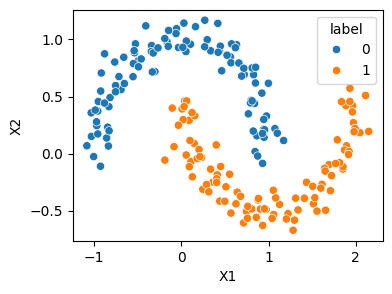

In [8]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='X1',y='X2',data=data,hue='label')
plt.show()

In [9]:
x=data.iloc[:,:-1]
y=data['label']

In [27]:
x

,X1,X2
0,-0.926767,-0.111073
1,-0.917583,0.706006
2,0.437984,0.899093
3,0.089694,0.291446
4,0.110672,-0.070806
...,...,...
195,-0.540630,0.901834
196,0.032085,0.411465
197,0.691922,0.679103
198,0.017034,0.930984


In [26]:
y

0      0
1      0
2      0
3      1
4      1
      ..
195    0
196    1
197    0
198    0
199    1
Name: label, Length: 200, dtype: int64

In [10]:
from imblearn.under_sampling import RandomUnderSampler

In [11]:
rus=RandomUnderSampler()

In [12]:
us_x,us_y=rus.fit_resample(x,y)

C:\Program Files\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [13]:
us_y.value_counts()

label
0    100
1    100
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(us_x,us_y,test_size=0.2,random_state=42)

In [16]:
len(x_train)

160

In [17]:
len(x_test)

40

In [18]:
{'linear', 'poly', 'rbf', 'sigmoid'} # This are the kernel parameter how we seprate ex. linearly,poly one by one we can try

{'linear', 'poly', 'rbf', 'sigmoid'}

In [19]:
from sklearn.svm import SVC  # svc for classifire and svr for regression

In [20]:
sc=SVC(kernel='rbf')
sc.fit(x_train,y_train)

SVC()

In [25]:
sc.score(x_test,y_test)*100, sc.score(x_train,y_train)*100

(100.0, 100.0)

In [30]:
sc.predict([[-0.926767,	-0.111073]])

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [22]:
from mlxtend.plotting import plot_decision_regions

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


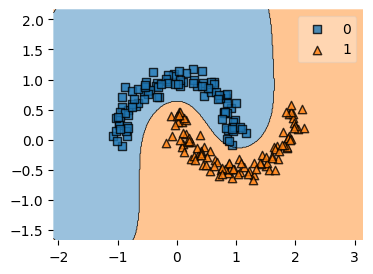

In [23]:
plt.figure(figsize=(4,3))
plot_decision_regions(x.to_numpy() , y.to_numpy() , clf=sc)
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score

In [34]:
cf=confusion_matrix(y_test,sc.predict(x_test))

In [35]:
cf

array([[21,  0],
       [ 0, 19]])

In [37]:
precision_score(y_test,sc.predict(x_test))*100

100.0

In [39]:
recall_score(y_test,sc.predict(x_test))*100

100.0

In [41]:
f1_score(y_test,sc.predict(x_test))*100

100.0